## Different imports and setup

In [1]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tqdm.keras import TqdmCallback
from tqdm.notebook import tqdm

In [3]:
# Custom plots file and tensorflow models
from Tools import Plot
from Tools import Custom_models
from Tools import Helpers

In [4]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Not working on GPU !')
else:
  print('Found GPU at: {}'.format(device_name))

Not working on GPU !


In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Set the seeds and extract the training data

In [6]:
# Set the seed for reproducibility
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed*2)

In [7]:
# Load the data
features_training, labels_training, features_testing, labels_testing = Helpers.Load_and_split_1D('Data/tanh_k50.txt',
                                                                                                 seed, ratio=0.9)

In [8]:
print(f'We will be training on {len(features_training)} examples !')
print(f'And testing on {len(features_testing)} examples !')

We will be training on 90000 examples !
And testing on 10000 examples !


## Create and train the model

In [9]:
# Create the model
learning_rate = 1e-2
batch = 32
K = 100
K_out = 1
N_epochs = 200

N_average = 10

histories = []
MSE = np.zeros(N_average)
MAE = np.zeros(N_average)
MaAE = np.zeros(N_average)

In [10]:
# Train

for i in tqdm(range(N_average)):
    
    name = f'conv_layer_non_trainable_K_{K}'
    save_name = f'Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_{K}_iteration_{i}'
    
    opt = Adam(learning_rate=learning_rate)
    model = Custom_models.Model_1D_conv(K1=K, K_output=K_out, train_first_layer=False, name=name)
    model.compile(loss=MeanSquaredError(), optimizer=opt)

    history = model.fit(features_training, labels_training, epochs=N_epochs, validation_split=0.1,
     batch_size=batch, validation_batch_size=batch, verbose=0, shuffle=True, initial_epoch=0,
      callbacks=[TqdmCallback()])
    
    histories.append(history)
    MSE[i] = Helpers.MSE(model, features_testing, labels_testing)
    MAE[i] = Helpers.MAE(model, features_testing, labels_testing)
    MaAE[i] = Helpers.MaAE(model, features_testing, labels_testing)
    
    model.save(save_name)

  0%|          | 0/10 [00:00<?, ?it/s]

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2021-11-03 21:34:26.291043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-03 21:34:26.291205: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_0/assets


2021-11-03 21:37:38.634146: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_1/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_2/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_3/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_4/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_5/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_6/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_7/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_8/assets


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: Saved_models/conv_layer_non_trainable_study/conv_layers_non_trainable_K_100_iteration_9/assets


In [11]:
with np.printoptions(formatter={'all':lambda x: f'{x:.4e}'}):
    print(MSE)
    print('\n')
    print(MAE)
    print('\n')
    print(MaAE)

[1.2069e-04 6.1756e-06 5.4077e-06 1.4055e-04 4.0588e-06 2.3790e-05
 3.4601e-05 2.3117e-05 8.7378e-06 5.1994e-05]


[8.5750e-03 1.7876e-03 1.6785e-03 8.8448e-03 1.3543e-03 4.2955e-03
 5.0133e-03 3.3949e-03 2.5702e-03 5.1289e-03]


[2.1693e-02 1.2451e-02 1.8618e-02 2.4374e-02 1.8566e-02 1.2028e-02
 1.3369e-02 1.5959e-02 1.1883e-02 1.5656e-02]


In [12]:
mean_mse = np.mean(MSE)
mean_mae = np.mean(MAE)
mean_maae = np.mean(MaAE)

print(f'MSE : min : {min(MSE):.4e} // mean : {mean_mse:.4e} // max : {max(MSE):.4e} \n')
print(f'MAE : min : {min(MAE):.4e} // mean : {mean_mae:.4e} // max : {max(MAE):.4e} \n')
print(f'MaAE : min : {min(MaAE):.4e} // mean : {mean_maae:.4e} // max : {max(MaAE):.4e} \n')

MSE : min : 4.0588e-06 // mean : 4.1913e-05 // max : 1.4055e-04 

MAE : min : 1.3543e-03 // mean : 4.2643e-03 // max : 8.8448e-03 

MaAE : min : 1.1883e-02 // mean : 1.6460e-02 // max : 2.4374e-02 



In [13]:
print(np.argmin(MSE))
print(np.argmin(MAE))
print(np.argmin(MaAE))

4
4
8


## Check the efficiency of training

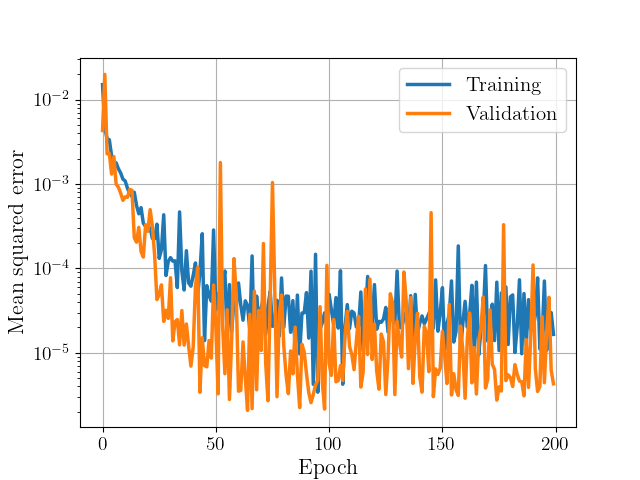

In [14]:
filename = 'Figures/conv_layer_training_error.pdf'
save = False

history = histories[4]

plt.figure()
plt.semilogy(history.epoch, np.array(history.history['loss']), label='Training')
plt.semilogy(history.epoch, np.array(history.history['val_loss']), label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.legend()
plt.grid()
if (save):
    plt.savefig(filename, bbox_inches='tight')
plt.show()

## Save the model

In [ ]:
# Save the model
model_name = 'Saved_models/test'
save_model = False

if (save_model):
    model.save(model_name)

## Check the results on the testing set

In [ ]:
sorting = np.argsort(features_testing)
features_testing = features_testing[sorting]
labels_testing = labels_testing[sorting]

prediction = model.predict(features_testing)
prediction = np.ravel(prediction)


In [ ]:
plt.figure()
plt.plot(features_testing, labels_testing, 'b-', label='true')
plt.plot(features_testing, prediction, 'r--', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()